# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.optimize as optimize       

# Import Dataset

In [2]:
# import csv files
read_df = pd.read_csv('covid19_Delhi_Data_final.csv')

In [3]:
# print the data set with number of rows and columns
read_df

,Date,Total Confirmed Cases,Total Active Cases,Total Recovered Cases,Total Deceased Cases,Total Tests Cases,Daily Confirmed Cases,Daily Active Cases,Daily Recovered Cases,Daily Deceased Cases,Daily Tests Cases,Doubling Time,Growth Rate
0,20-04-2020,2081,1603,431,47,25900.0,78,-65,141,2,1513.0,6.1,5.8
1,21-04-2020,2156,1498,611,47,26627.0,75,-105,180,0,727.0,6.1,3.6
2,22-04-2020,2248,1476,724,48,28309.0,92,-22,113,1,1682.0,4.9,3.6
3,23-04-2020,2376,1518,808,50,30560.0,128,42,84,2,2251.0,4.6,4.3
4,24-04-2020,2514,1604,857,53,33672.0,138,86,49,3,3112.0,4.8,5.7
5,25-04-2020,2625,1702,869,54,35519.0,111,98,12,1,1847.0,4.8,5.8
6,26-04-2020,2918,1987,877,54,37613.0,293,285,8,0,2094.0,5.2,11.1
7,27-04-2020,3108,2177,877,54,39911.0,190,190,0,0,2298.0,4.9,11.2
8,28-04-2020,3314,2182,1078,54,43370.0,206,5,201,0,3459.0,5.2,6.5
9,29-04-2020,3439,2291,1092,56,47225.0,125,109,14,2,3855.0,5.2,6.6


# Data Cleaning

In [4]:
# head() defines read first 5 data 
read_df.head()

,Date,Total Confirmed Cases,Total Active Cases,Total Recovered Cases,Total Deceased Cases,Total Tests Cases,Daily Confirmed Cases,Daily Active Cases,Daily Recovered Cases,Daily Deceased Cases,Daily Tests Cases,Doubling Time,Growth Rate
0,20-04-2020,2081,1603,431,47,25900.0,78,-65,141,2,1513.0,6.1,5.8
1,21-04-2020,2156,1498,611,47,26627.0,75,-105,180,0,727.0,6.1,3.6
2,22-04-2020,2248,1476,724,48,28309.0,92,-22,113,1,1682.0,4.9,3.6
3,23-04-2020,2376,1518,808,50,30560.0,128,42,84,2,2251.0,4.6,4.3
4,24-04-2020,2514,1604,857,53,33672.0,138,86,49,3,3112.0,4.8,5.7


In [5]:
# tail() defines read last 5 data 
read_df.tail()

,Date,Total Confirmed Cases,Total Active Cases,Total Recovered Cases,Total Deceased Cases,Total Tests Cases,Daily Confirmed Cases,Daily Active Cases,Daily Recovered Cases,Daily Deceased Cases,Daily Tests Cases,Doubling Time,Growth Rate
21,14-05-2020,8470,5310,3045,115,119736.0,472,276,187,9,6391.0,6.2,4.7
22,15-05-2020,8895,5254,3518,123,125189.0,425,-56,473,8,5453.0,6.3,5.9
23,16-05-2020,9333,5278,3926,129,130845.0,438,24,408,6,5656.0,6.4,5.0
24,17-05-2020,9755,5405,4202,148,135791.0,422,127,276,19,4946.0,6.4,4.9
25,18-05-2020,10054,5409,4485,160,139727.0,299,4,283,12,3936.0,6.5,4.5


In [6]:
read_df.columns

Index(['Date', 'Total Confirmed Cases', 'Total Active Cases',
       'Total Recovered Cases', 'Total Deceased Cases', 'Total Tests Cases',
       'Daily Confirmed Cases', 'Daily Active Cases', 'Daily Recovered Cases',
       'Daily Deceased Cases', 'Daily Tests Cases', 'Doubling Time',
       'Growth Rate'],
      dtype='object')

In [7]:
# changing column name
column_names = ['Date', 'Total_Confirmed_Cases', 'Total_Active_Cases',
       'Total_Recovered_Cases', 'Total_Deceased_Cases', 'Total_Tests_Cases',
       'Daily_Confirmed_Cases', 'Daily_Active_Cases', 'Daily_Recovered_Cases',
       'Daily_Deceased_Cases', 'Daily_Tests_Cases', 'Doubling_Time',
       'Growth_Rate']

read_df.columns=column_names

In [8]:
# print columns
read_df

,Date,Total_Confirmed_Cases,Total_Active_Cases,Total_Recovered_Cases,Total_Deceased_Cases,Total_Tests_Cases,Daily_Confirmed_Cases,Daily_Active_Cases,Daily_Recovered_Cases,Daily_Deceased_Cases,Daily_Tests_Cases,Doubling_Time,Growth_Rate
0,20-04-2020,2081,1603,431,47,25900.0,78,-65,141,2,1513.0,6.1,5.8
1,21-04-2020,2156,1498,611,47,26627.0,75,-105,180,0,727.0,6.1,3.6
2,22-04-2020,2248,1476,724,48,28309.0,92,-22,113,1,1682.0,4.9,3.6
3,23-04-2020,2376,1518,808,50,30560.0,128,42,84,2,2251.0,4.6,4.3
4,24-04-2020,2514,1604,857,53,33672.0,138,86,49,3,3112.0,4.8,5.7
5,25-04-2020,2625,1702,869,54,35519.0,111,98,12,1,1847.0,4.8,5.8
6,26-04-2020,2918,1987,877,54,37613.0,293,285,8,0,2094.0,5.2,11.1
7,27-04-2020,3108,2177,877,54,39911.0,190,190,0,0,2298.0,4.9,11.2
8,28-04-2020,3314,2182,1078,54,43370.0,206,5,201,0,3459.0,5.2,6.5
9,29-04-2020,3439,2291,1092,56,47225.0,125,109,14,2,3855.0,5.2,6.6


In [9]:
# shape define number of rows and columns
read_df.shape

(26, 13)

In [10]:
# describe shows mean, std, min,max
read_df.describe()

,Total_Confirmed_Cases,Total_Active_Cases,Total_Recovered_Cases,Total_Deceased_Cases,Total_Tests_Cases,Daily_Confirmed_Cases,Daily_Active_Cases,Daily_Recovered_Cases,Daily_Deceased_Cases,Daily_Tests_Cases,Doubling_Time,Growth_Rate
count,26.000000,26.000000,26.000000,26.000000,24.000000,26.000000,26.000000,26.000000,26.000000,23.000000,26.000000,26.000000
mean,5133.269231,3283.615385,1774.230769,75.423077,71141.291667,265.846154,117.923077,142.192308,4.192308,3721.869565,5.680769,6.219231
std,2649.864382,1482.093467,1188.580475,32.934083,38999.763719,136.233533,133.585006,138.776949,5.824220,1938.380142,0.574121,2.489019
min,2081.000000,1476.000000,431.000000,47.000000,25900.000000,75.000000,-105.000000,0.000000,0.000000,727.000000,4.600000,2.200000
25%,2965.500000,2034.500000,877.000000,54.000000,37089.500000,130.500000,6.250000,40.000000,0.000000,2172.500000,5.200000,4.500000
50%,4335.500000,2962.500000,1309.000000,64.000000,62177.000000,258.500000,103.000000,89.000000,2.000000,3744.000000,5.800000,5.750000
75%,7364.750000,4889.000000,2389.000000,81.500000,107918.000000,400.500000,241.250000,197.500000,5.250000,4539.500000,6.100000,7.425000
max,10054.000000,5409.000000,4485.000000,160.000000,139727.000000,472.000000,353.000000,473.000000,20.000000,8431.000000,6.500000,11.200000


In [11]:
# info shows detail of all columns
read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
Date                     26 non-null object
Total_Confirmed_Cases    26 non-null int64
Total_Active_Cases       26 non-null int64
Total_Recovered_Cases    26 non-null int64
Total_Deceased_Cases     26 non-null int64
Total_Tests_Cases        24 non-null float64
Daily_Confirmed_Cases    26 non-null int64
Daily_Active_Cases       26 non-null int64
Daily_Recovered_Cases    26 non-null int64
Daily_Deceased_Cases     26 non-null int64
Daily_Tests_Cases        23 non-null float64
Doubling_Time            26 non-null float64
Growth_Rate              26 non-null float64
dtypes: float64(4), int64(8), object(1)
memory usage: 2.7+ KB


In [12]:
# dtype show each data types
read_df.dtypes

Date                      object
Total_Confirmed_Cases      int64
Total_Active_Cases         int64
Total_Recovered_Cases      int64
Total_Deceased_Cases       int64
Total_Tests_Cases        float64
Daily_Confirmed_Cases      int64
Daily_Active_Cases         int64
Daily_Recovered_Cases      int64
Daily_Deceased_Cases       int64
Daily_Tests_Cases        float64
Doubling_Time            float64
Growth_Rate              float64
dtype: object

In [13]:
# checking the columns if it contains null values(NA)[1] or not[0]
# isnull() defines checks null values 
# sum() defines no. of null values
read_df[column_names].isnull().sum()

Date                     0
Total_Confirmed_Cases    0
Total_Active_Cases       0
Total_Recovered_Cases    0
Total_Deceased_Cases     0
Total_Tests_Cases        2
Daily_Confirmed_Cases    0
Daily_Active_Cases       0
Daily_Recovered_Cases    0
Daily_Deceased_Cases     0
Daily_Tests_Cases        3
Doubling_Time            0
Growth_Rate              0
dtype: int64

In [14]:
# Here, we are trying to find all the categorical and numerical variables separately.
cat_list = []
num_list = []

for variable in read_df.columns:
    if read_df[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)

print("Categorical Variables : ", cat_list, '\n')
print("Numerical Variables : ", num_list)

Categorical Variables :  ['Date'] 

Numerical Variables :  ['Total_Confirmed_Cases', 'Total_Active_Cases', 'Total_Recovered_Cases', 'Total_Deceased_Cases', 'Total_Tests_Cases', 'Daily_Confirmed_Cases', 'Daily_Active_Cases', 'Daily_Recovered_Cases', 'Daily_Deceased_Cases', 'Daily_Tests_Cases', 'Doubling_Time', 'Growth_Rate']


In [15]:
# describe first 7 columns
read_df[column_names[:7]].describe()

,Total_Confirmed_Cases,Total_Active_Cases,Total_Recovered_Cases,Total_Deceased_Cases,Total_Tests_Cases,Daily_Confirmed_Cases
count,26.000000,26.000000,26.000000,26.000000,24.000000,26.000000
mean,5133.269231,3283.615385,1774.230769,75.423077,71141.291667,265.846154
std,2649.864382,1482.093467,1188.580475,32.934083,38999.763719,136.233533
min,2081.000000,1476.000000,431.000000,47.000000,25900.000000,75.000000
25%,2965.500000,2034.500000,877.000000,54.000000,37089.500000,130.500000
50%,4335.500000,2962.500000,1309.000000,64.000000,62177.000000,258.500000
75%,7364.750000,4889.000000,2389.000000,81.500000,107918.000000,400.500000
max,10054.000000,5409.000000,4485.000000,160.000000,139727.000000,472.000000


In [16]:
# describe after 7th column till 11th column
read_df[column_names[7:]].describe()

,Daily_Active_Cases,Daily_Recovered_Cases,Daily_Deceased_Cases,Daily_Tests_Cases,Doubling_Time,Growth_Rate
count,26.000000,26.000000,26.000000,23.000000,26.000000,26.000000
mean,117.923077,142.192308,4.192308,3721.869565,5.680769,6.219231
std,133.585006,138.776949,5.824220,1938.380142,0.574121,2.489019
min,-105.000000,0.000000,0.000000,727.000000,4.600000,2.200000
25%,6.250000,40.000000,0.000000,2172.500000,5.200000,4.500000
50%,103.000000,89.000000,2.000000,3744.000000,5.800000,5.750000
75%,241.250000,197.500000,5.250000,4539.500000,6.100000,7.425000
max,353.000000,473.000000,20.000000,8431.000000,6.500000,11.200000


In [17]:
read_df.Date.describe()

count             26
unique            26
top       04-05-2020
freq               1
Name: Date, dtype: object

# Data Processing

In [18]:
FMT = '%d-%m-%Y'
date = read_df['Date']
read_df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("31-12-2019", FMT)).days  )

In [19]:
read_df

,Date,Total_Confirmed_Cases,Total_Active_Cases,Total_Recovered_Cases,Total_Deceased_Cases,Total_Tests_Cases,Daily_Confirmed_Cases,Daily_Active_Cases,Daily_Recovered_Cases,Daily_Deceased_Cases,Daily_Tests_Cases,Doubling_Time,Growth_Rate
0,111,2081,1603,431,47,25900.0,78,-65,141,2,1513.0,6.1,5.8
1,112,2156,1498,611,47,26627.0,75,-105,180,0,727.0,6.1,3.6
2,113,2248,1476,724,48,28309.0,92,-22,113,1,1682.0,4.9,3.6
3,114,2376,1518,808,50,30560.0,128,42,84,2,2251.0,4.6,4.3
4,115,2514,1604,857,53,33672.0,138,86,49,3,3112.0,4.8,5.7
5,116,2625,1702,869,54,35519.0,111,98,12,1,1847.0,4.8,5.8
6,117,2918,1987,877,54,37613.0,293,285,8,0,2094.0,5.2,11.1
7,118,3108,2177,877,54,39911.0,190,190,0,0,2298.0,4.9,11.2
8,119,3314,2182,1078,54,43370.0,206,5,201,0,3459.0,5.2,6.5
9,120,3439,2291,1092,56,47225.0,125,109,14,2,3855.0,5.2,6.6


In [20]:
# head() defines read first 5 data 
read_df.head()

,Date,Total_Confirmed_Cases,Total_Active_Cases,Total_Recovered_Cases,Total_Deceased_Cases,Total_Tests_Cases,Daily_Confirmed_Cases,Daily_Active_Cases,Daily_Recovered_Cases,Daily_Deceased_Cases,Daily_Tests_Cases,Doubling_Time,Growth_Rate
0,111,2081,1603,431,47,25900.0,78,-65,141,2,1513.0,6.1,5.8
1,112,2156,1498,611,47,26627.0,75,-105,180,0,727.0,6.1,3.6
2,113,2248,1476,724,48,28309.0,92,-22,113,1,1682.0,4.9,3.6
3,114,2376,1518,808,50,30560.0,128,42,84,2,2251.0,4.6,4.3
4,115,2514,1604,857,53,33672.0,138,86,49,3,3112.0,4.8,5.7


In [21]:
# tail() defines read last 5 data 
read_df.tail()

,Date,Total_Confirmed_Cases,Total_Active_Cases,Total_Recovered_Cases,Total_Deceased_Cases,Total_Tests_Cases,Daily_Confirmed_Cases,Daily_Active_Cases,Daily_Recovered_Cases,Daily_Deceased_Cases,Daily_Tests_Cases,Doubling_Time,Growth_Rate
21,135,8470,5310,3045,115,119736.0,472,276,187,9,6391.0,6.2,4.7
22,136,8895,5254,3518,123,125189.0,425,-56,473,8,5453.0,6.3,5.9
23,137,9333,5278,3926,129,130845.0,438,24,408,6,5656.0,6.4,5.0
24,138,9755,5405,4202,148,135791.0,422,127,276,19,4946.0,6.4,4.9
25,139,10054,5409,4485,160,139727.0,299,4,283,12,3936.0,6.5,4.5


In [22]:
# Here, we are trying to find all the categorical and numerical variables separately.
cat_list = []
num_list = []

for variable in read_df.columns:
    if read_df[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)

print("Categorical Variables : ", cat_list, '\n')
print("Numerical Variables : ", num_list)

Categorical Variables :  [] 

Numerical Variables :  ['Date', 'Total_Confirmed_Cases', 'Total_Active_Cases', 'Total_Recovered_Cases', 'Total_Deceased_Cases', 'Total_Tests_Cases', 'Daily_Confirmed_Cases', 'Daily_Active_Cases', 'Daily_Recovered_Cases', 'Daily_Deceased_Cases', 'Daily_Tests_Cases', 'Doubling_Time', 'Growth_Rate']


In [23]:
# describe shows mean, std, min,max
read_df.describe()

,Date,Total_Confirmed_Cases,Total_Active_Cases,Total_Recovered_Cases,Total_Deceased_Cases,Total_Tests_Cases,Daily_Confirmed_Cases,Daily_Active_Cases,Daily_Recovered_Cases,Daily_Deceased_Cases,Daily_Tests_Cases,Doubling_Time,Growth_Rate
count,26.000000,26.000000,26.000000,26.000000,26.000000,24.000000,26.000000,26.000000,26.000000,26.000000,23.000000,26.000000,26.000000
mean,124.384615,5133.269231,3283.615385,1774.230769,75.423077,71141.291667,265.846154,117.923077,142.192308,4.192308,3721.869565,5.680769,6.219231
std,8.777594,2649.864382,1482.093467,1188.580475,32.934083,38999.763719,136.233533,133.585006,138.776949,5.824220,1938.380142,0.574121,2.489019
min,111.000000,2081.000000,1476.000000,431.000000,47.000000,25900.000000,75.000000,-105.000000,0.000000,0.000000,727.000000,4.600000,2.200000
25%,117.250000,2965.500000,2034.500000,877.000000,54.000000,37089.500000,130.500000,6.250000,40.000000,0.000000,2172.500000,5.200000,4.500000
50%,123.500000,4335.500000,2962.500000,1309.000000,64.000000,62177.000000,258.500000,103.000000,89.000000,2.000000,3744.000000,5.800000,5.750000
75%,132.250000,7364.750000,4889.000000,2389.000000,81.500000,107918.000000,400.500000,241.250000,197.500000,5.250000,4539.500000,6.100000,7.425000
max,139.000000,10054.000000,5409.000000,4485.000000,160.000000,139727.000000,472.000000,353.000000,473.000000,20.000000,8431.000000,6.500000,11.200000


# Data Analysis

# 1. Date

In [24]:
read_df.Date.describe()

count     26.000000
mean     124.384615
std        8.777594
min      111.000000
25%      117.250000
50%      123.500000
75%      132.250000
max      139.000000
Name: Date, dtype: float64

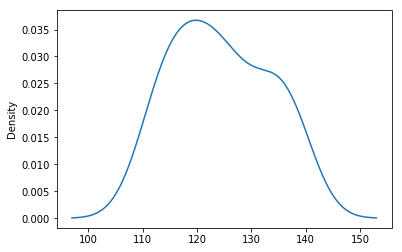

In [25]:
# plot density curve of Date after cleaning null values
read_df.Date.plot.density()

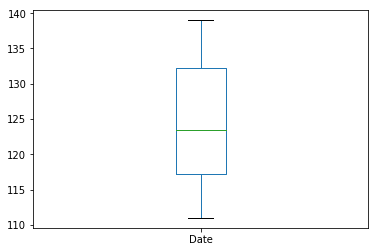

In [26]:
# Box and Whisker Plots
read_df.Date.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

# 2.  Total_Confirmed_Cases

In [27]:
read_df.Total_Confirmed_Cases.describe()

count       26.000000
mean      5133.269231
std       2649.864382
min       2081.000000
25%       2965.500000
50%       4335.500000
75%       7364.750000
max      10054.000000
Name: Total_Confirmed_Cases, dtype: float64

In [28]:
# Displaying mean 
read_df.Total_Confirmed_Cases.mean()

5133.2692307692305

In [29]:
# Displaying mode 
read_df.Total_Confirmed_Cases.mode()

0    6542
dtype: int64

In [30]:
# displaying median 
read_df.Total_Confirmed_Cases.median()

4335.5

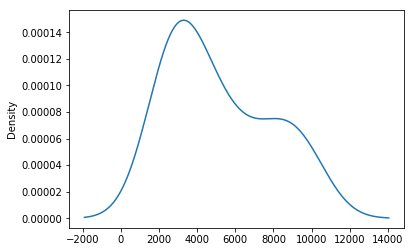

In [31]:
# plot density curve of Total_Confirmed_Cases after cleaning null values
read_df.Total_Confirmed_Cases.plot.density()

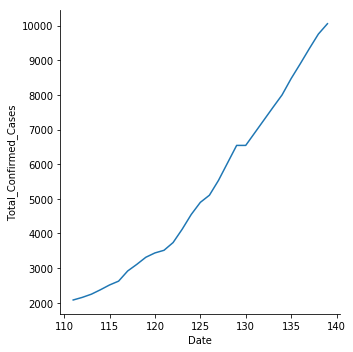

In [32]:
# Relplot
sns.relplot(x="Date", y="Total_Confirmed_Cases", kind="line", data=read_df)

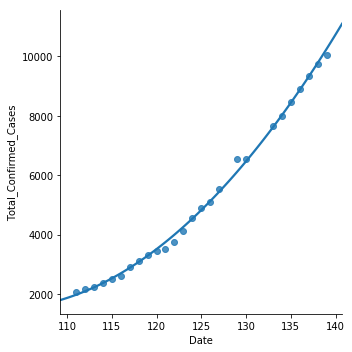

In [33]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Total_Confirmed_Cases", data = read_df, order = 2, ci = None)

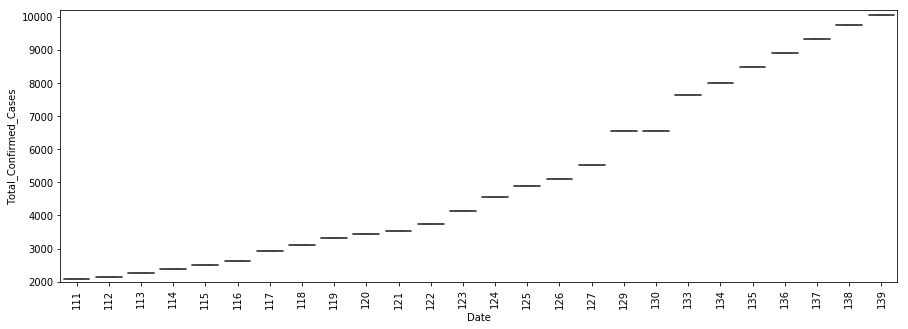

In [34]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Total_Confirmed_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Total_Confirmed_Cases", data=data2)
fig.axis(ymin=2000, ymax=10200);
plt.xticks(rotation=90);

# 3. Total_Active_Cases

In [35]:
read_df.Total_Active_Cases.describe()

count      26.000000
mean     3283.615385
std      1482.093467
min      1476.000000
25%      2034.500000
50%      2962.500000
75%      4889.000000
max      5409.000000
Name: Total_Active_Cases, dtype: float64

In [36]:
# Displaying mean 
read_df.Total_Active_Cases.mean()

3283.6153846153848

In [37]:
# displaying mode 
read_df.Total_Active_Cases.mode()

0    4454
dtype: int64

In [38]:
# displaying median 
read_df.Total_Active_Cases.median()

2962.5

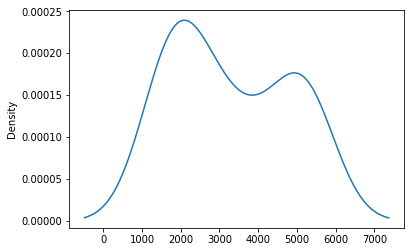

In [39]:
# plot density curve of Total_Active_Cases after cleaning null values
read_df.Total_Active_Cases.plot.density()

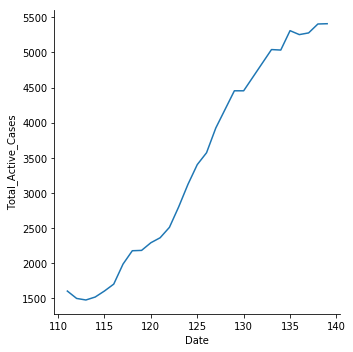

In [40]:
# Relplot
sns.relplot(x="Date", y="Total_Active_Cases", kind="line", data=read_df)

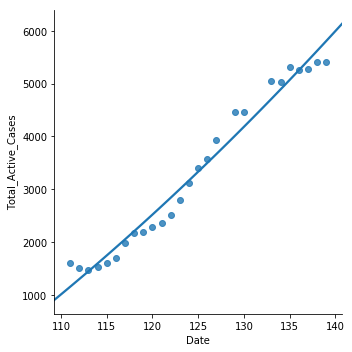

In [41]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Total_Active_Cases", data = read_df, order = 2, ci = None)

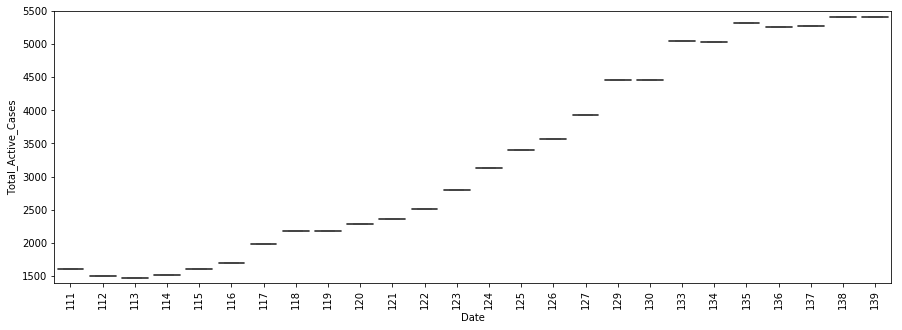

In [42]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Total_Active_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Total_Active_Cases", data=data2)
fig.axis(ymin=1400, ymax=5500);
plt.xticks(rotation=90);

# 4. Total_Recovered_Cases

In [43]:
read_df.Total_Recovered_Cases.describe()

count      26.000000
mean     1774.230769
std      1188.580475
min       431.000000
25%       877.000000
50%      1309.000000
75%      2389.000000
max      4485.000000
Name: Total_Recovered_Cases, dtype: float64

In [44]:
# Displaying mean 
read_df.Total_Recovered_Cases.mean()

1774.2307692307693

In [45]:
# displaying mode 
read_df.Total_Recovered_Cases.mode()

0     877
1    2020
dtype: int64

In [46]:
# displaying median 
read_df.Total_Recovered_Cases.median()

1309.0

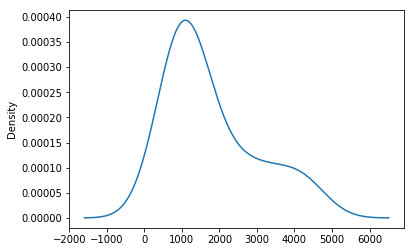

In [47]:
# plot density curve of Total_Recovered_Cases after cleaning null values
read_df.Total_Recovered_Cases.plot.density()

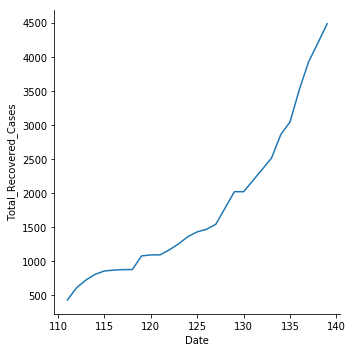

In [48]:
# Relplot
sns.relplot(x="Date", y="Total_Recovered_Cases", kind="line", data=read_df)

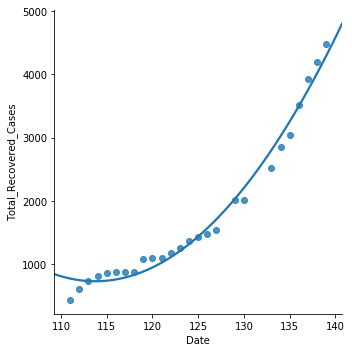

In [49]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Total_Recovered_Cases", data = read_df, order = 2, ci = None)

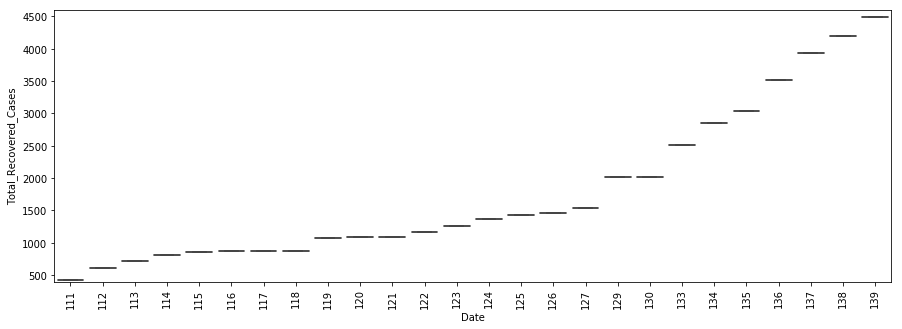

In [50]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Total_Recovered_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Total_Recovered_Cases", data=data2)
fig.axis(ymin=400, ymax=4600);
plt.xticks(rotation=90);

# 5. Total_Deceased_Cases

In [51]:
read_df.Total_Deceased_Cases.describe()

count     26.000000
mean      75.423077
std       32.934083
min       47.000000
25%       54.000000
50%       64.000000
75%       81.500000
max      160.000000
Name: Total_Deceased_Cases, dtype: float64

In [52]:
# Displaying mean 
read_df.Total_Deceased_Cases.mean()

75.42307692307692

In [53]:
# displaying mode 
read_df.Total_Deceased_Cases.mode()

0    54
1    64
dtype: int64

In [54]:
# displaying median 
read_df.Total_Deceased_Cases.median()

64.0

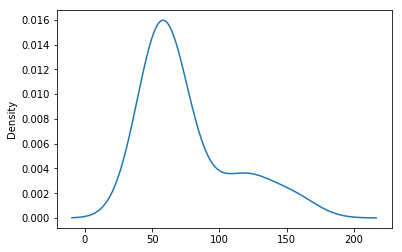

In [55]:
# plot density curve of Total_Deceased_Cases after cleaning null values
read_df.Total_Deceased_Cases.plot.density()

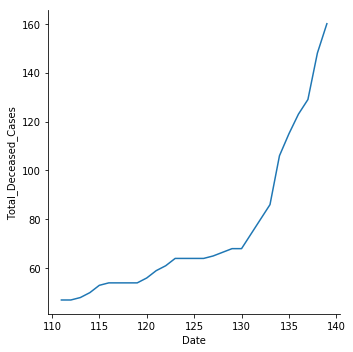

In [56]:
# Relplot
sns.relplot(x="Date", y="Total_Deceased_Cases", kind="line", data=read_df)

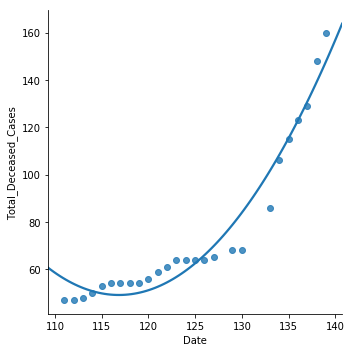

In [57]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Total_Deceased_Cases", data = read_df, order = 2, ci = None)

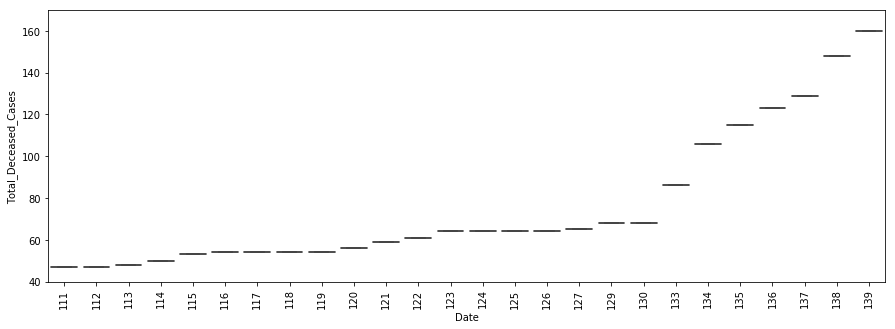

In [58]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Total_Deceased_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Total_Deceased_Cases", data=data2)
fig.axis(ymin=40, ymax=170);
plt.xticks(rotation=90);

# 6. Total_Tests_Cases

In [59]:
read_df.Total_Tests_Cases.describe()

count        24.000000
mean      71141.291667
std       38999.763719
min       25900.000000
25%       37089.500000
50%       62177.000000
75%      107918.000000
max      139727.000000
Name: Total_Tests_Cases, dtype: float64

In [60]:
# Displaying mean 
read_df.Total_Tests_Cases.mean()

71141.29166666667

In [61]:
# displaying mode 
read_df.Total_Tests_Cases.mode()

0      25900.0
1      26627.0
2      28309.0
3      30560.0
4      33672.0
5      35519.0
6      37613.0
7      39911.0
8      43370.0
9      47225.0
10     58210.0
11     60246.0
12     64108.0
13     67852.0
14     71934.0
15     81367.0
16     84226.0
17    106109.0
18    113345.0
19    119736.0
20    125189.0
21    130845.0
22    135791.0
23    139727.0
dtype: float64

In [62]:
# displaying median 
read_df.Total_Tests_Cases.median()

62177.0

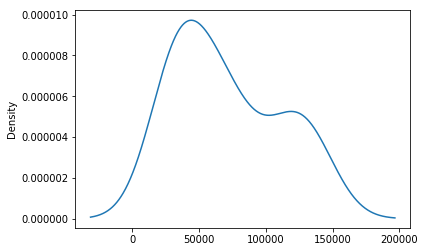

In [63]:
# plot density curve of Total_Tests_Cases after cleaning null values
read_df.Total_Tests_Cases.plot.density()

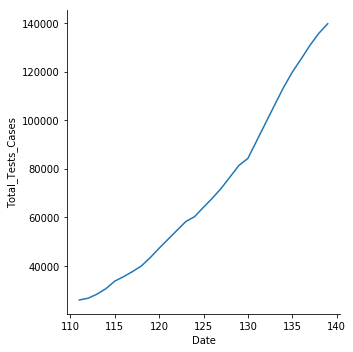

In [64]:
# Relplot
sns.relplot(x="Date", y="Total_Tests_Cases", kind="line", data=read_df)

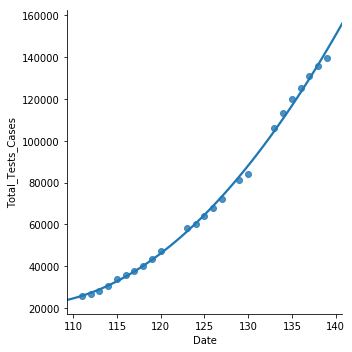

In [65]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Total_Tests_Cases", data = read_df, order = 2, ci = None)

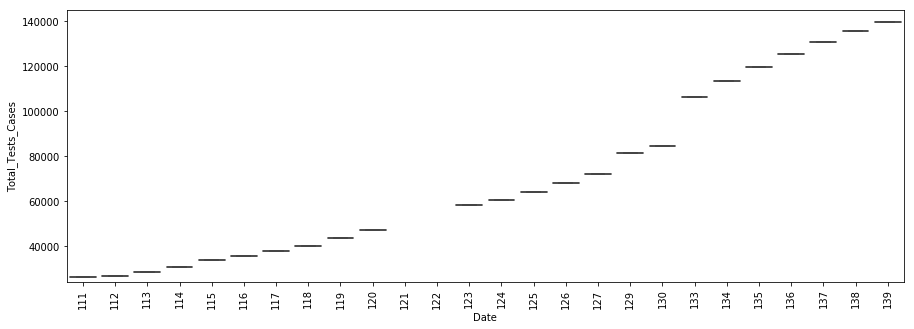

In [66]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Total_Tests_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Total_Tests_Cases", data=data2)
fig.axis(ymin=24000, ymax=145000);
plt.xticks(rotation=90);

# 7. Daily_Confirmed_Cases

In [67]:
read_df.Daily_Confirmed_Cases.describe()

count     26.000000
mean     265.846154
std      136.233533
min       75.000000
25%      130.500000
50%      258.500000
75%      400.500000
max      472.000000
Name: Daily_Confirmed_Cases, dtype: float64

In [68]:
# Displaying mean 
read_df.Daily_Confirmed_Cases.mean()

265.84615384615387

In [69]:
# displaying mode 
read_df.Daily_Confirmed_Cases.mode()

0    206
dtype: int64

In [70]:
# displaying median 
read_df.Daily_Confirmed_Cases.median()

258.5

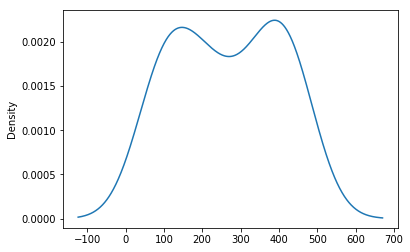

In [71]:
# plot density curve of Daily_Confirmed_Cases after cleaning null values
read_df.Daily_Confirmed_Cases.plot.density()

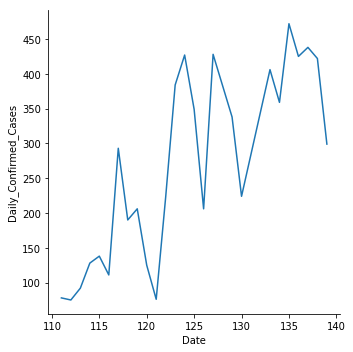

In [72]:
# Relplot
sns.relplot(x="Date", y="Daily_Confirmed_Cases", kind="line", data=read_df)

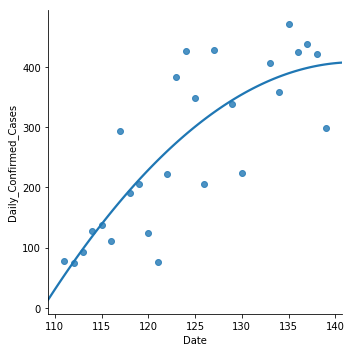

In [73]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Daily_Confirmed_Cases", data = read_df, order = 2, ci = None)

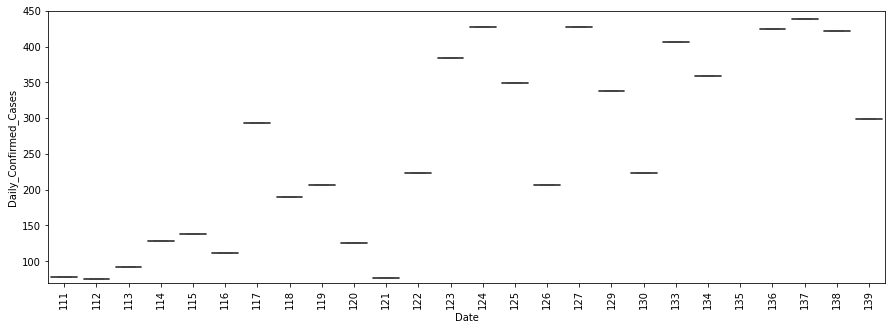

In [74]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Daily_Confirmed_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Daily_Confirmed_Cases", data=data2)
fig.axis(ymin=70, ymax=450);
plt.xticks(rotation=90);

# 8. Daily_Active_Cases

In [75]:
read_df.Daily_Active_Cases.describe()

count     26.000000
mean     117.923077
std      133.585006
min     -105.000000
25%        6.250000
50%      103.000000
75%      241.250000
max      353.000000
Name: Daily_Active_Cases, dtype: float64

In [76]:
# Displaying mean 
read_df.Daily_Active_Cases.mean()

117.92307692307692

In [77]:
# displaying mode 
read_df.Daily_Active_Cases.mode()

0    -105
1     -65
2     -56
3     -22
4      -7
5       4
6       5
7      10
8      24
9      42
10     71
11     86
12     98
13    108
14    109
15    127
16    169
17    190
18    224
19    247
20    276
21    280
22    285
23    292
24    321
25    353
dtype: int64

In [78]:
# displaying median 
read_df.Daily_Active_Cases.median()

103.0

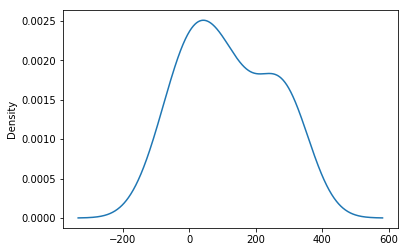

In [79]:
# plot density curve of Daily_Active_Cases after cleaning null values
read_df.Daily_Active_Cases.plot.density()

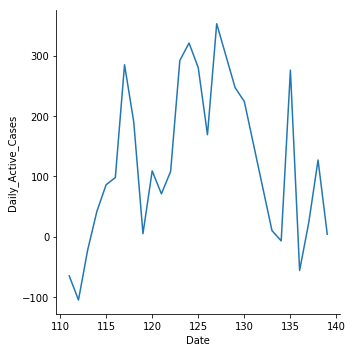

In [80]:
# Relplot
sns.relplot(x="Date", y="Daily_Active_Cases", kind="line", data=read_df)

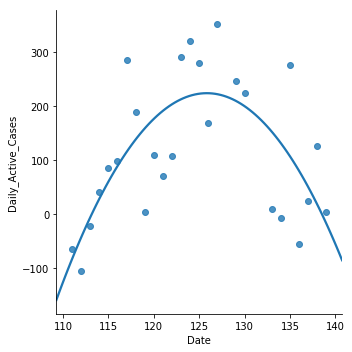

In [81]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Daily_Active_Cases", data = read_df, order = 2, ci = None)

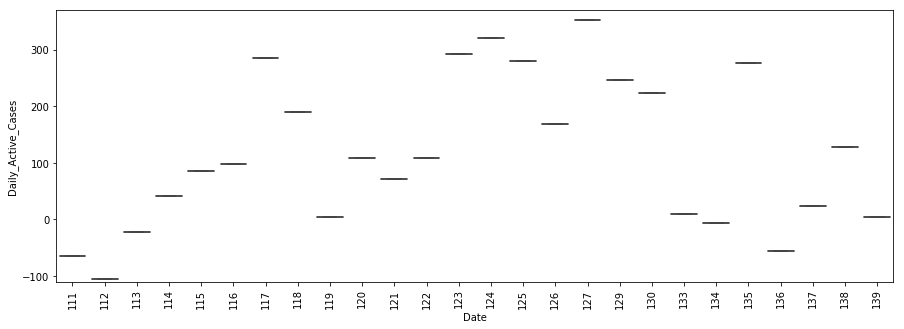

In [82]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Daily_Active_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Daily_Active_Cases", data=data2)
fig.axis(ymin=-110, ymax=370);
plt.xticks(rotation=90);

# 9. Daily_Recovered_Cases

In [83]:
read_df.Daily_Recovered_Cases.describe()

count     26.000000
mean     142.192308
std      138.776949
min        0.000000
25%       40.000000
50%       89.000000
75%      197.500000
max      473.000000
Name: Daily_Recovered_Cases, dtype: float64

In [84]:
# Displaying mean 
read_df.Daily_Recovered_Cases.mean()

142.19230769230768

In [85]:
# displaying mode 
read_df.Daily_Recovered_Cases.mode()

0     0
1    89
dtype: int64

In [86]:
# displaying median 
read_df.Daily_Recovered_Cases.median()

89.0

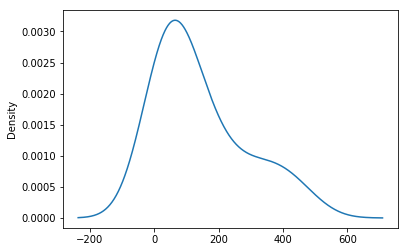

In [87]:
# plot density curve of Daily_Recovered_Cases after cleaning null values
read_df.Daily_Recovered_Cases.plot.density()

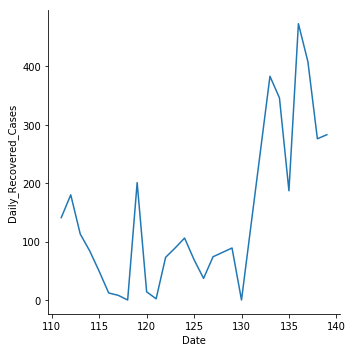

In [88]:
# Relplot
sns.relplot(x="Date", y="Daily_Recovered_Cases", kind="line", data=read_df)

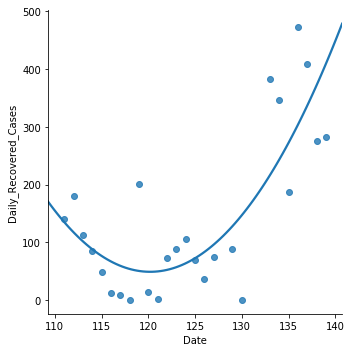

In [89]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Daily_Recovered_Cases", data = read_df, order = 2, ci = None)

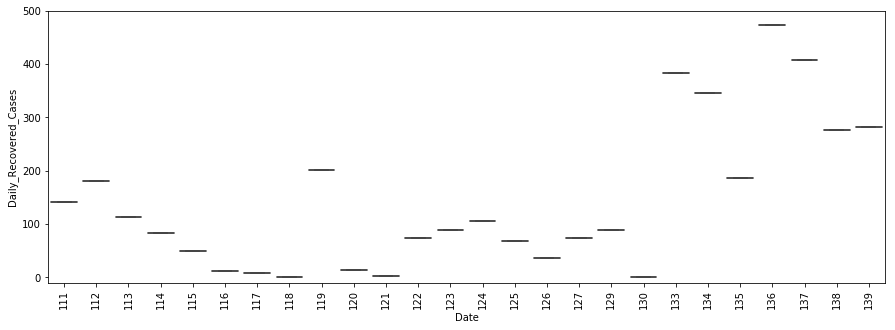

In [90]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Daily_Recovered_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Daily_Recovered_Cases", data=data2)
fig.axis(ymin=-10, ymax=500);
plt.xticks(rotation=90);

# 10. Daily_Deceased_Cases

In [91]:
read_df.Daily_Deceased_Cases.describe()

count    26.000000
mean      4.192308
std       5.824220
min       0.000000
25%       0.000000
50%       2.000000
75%       5.250000
max      20.000000
Name: Daily_Deceased_Cases, dtype: float64

In [92]:
# Displaying mean 
read_df.Daily_Deceased_Cases.mean()

4.1923076923076925

In [93]:
# displaying mode 
read_df.Daily_Deceased_Cases.mode()

0    0
dtype: int64

In [94]:
# displaying median 
read_df.Daily_Deceased_Cases.median()

2.0

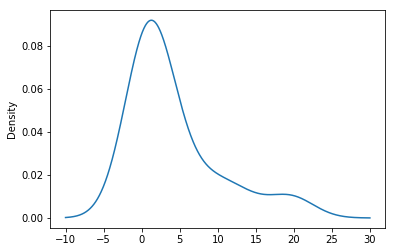

In [95]:
# plot density curve of Daily_Deceased_Cases after cleaning null values
read_df.Daily_Deceased_Cases.plot.density()

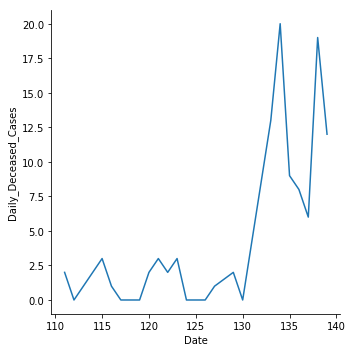

In [96]:
# Relplot
sns.relplot(x="Date", y="Daily_Deceased_Cases", kind="line", data=read_df)

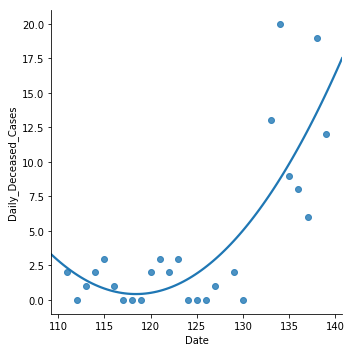

In [97]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Daily_Deceased_Cases", data = read_df, order = 2, ci = None)

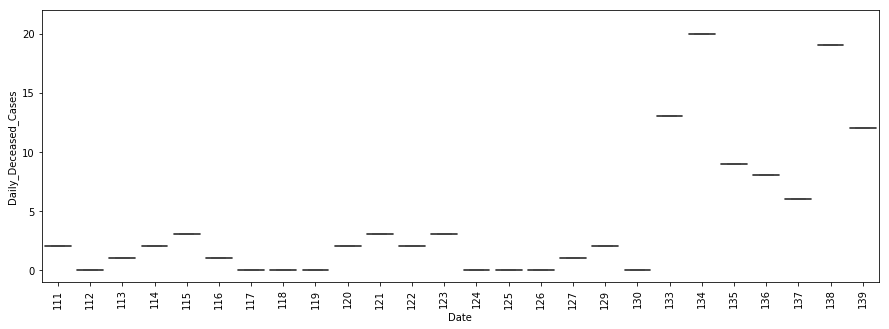

In [98]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Daily_Deceased_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Daily_Deceased_Cases", data=data2)
fig.axis(ymin=-1, ymax=22);
plt.xticks(rotation=90);

# 11. Daily_Tests_Cases

In [99]:
read_df.Daily_Tests_Cases.describe()

count      23.000000
mean     3721.869565
std      1938.380142
min       727.000000
25%      2172.500000
50%      3744.000000
75%      4539.500000
max      8431.000000
Name: Daily_Tests_Cases, dtype: float64

In [100]:
# Displaying mean 
read_df.Daily_Tests_Cases.mean()

3721.8695652173915

In [101]:
# displaying mode 
read_df.Daily_Tests_Cases.mode()

0      727.0
1     1513.0
2     1682.0
3     1847.0
4     2036.0
5     2094.0
6     2251.0
7     2298.0
8     2859.0
9     3112.0
10    3459.0
11    3744.0
12    3855.0
13    3862.0
14    3936.0
15    4082.0
16    4133.0
17    4946.0
18    5453.0
19    5656.0
20    6391.0
21    7236.0
22    8431.0
dtype: float64

In [102]:
# displaying median 
read_df.Daily_Tests_Cases.median()

3744.0

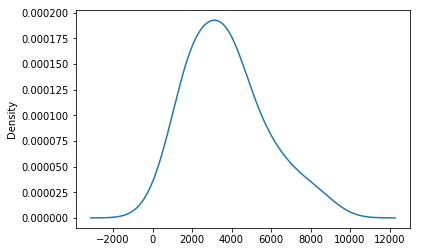

In [103]:
# plot density curve of Daily_Tests_Cases after cleaning null values
read_df.Daily_Tests_Cases.plot.density()

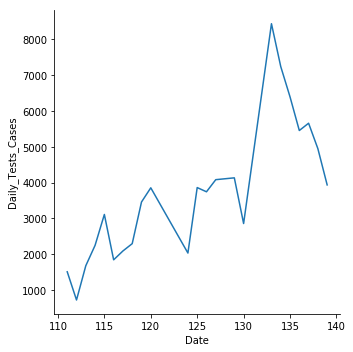

In [104]:
# Relplot
sns.relplot(x="Date", y="Daily_Tests_Cases", kind="line", data=read_df)

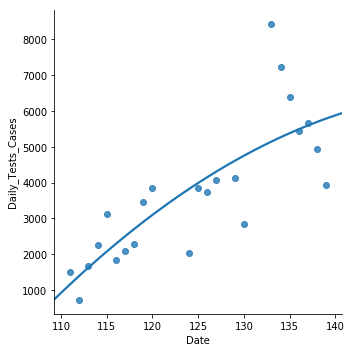

In [105]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Daily_Tests_Cases", data = read_df, order = 2, ci = None)

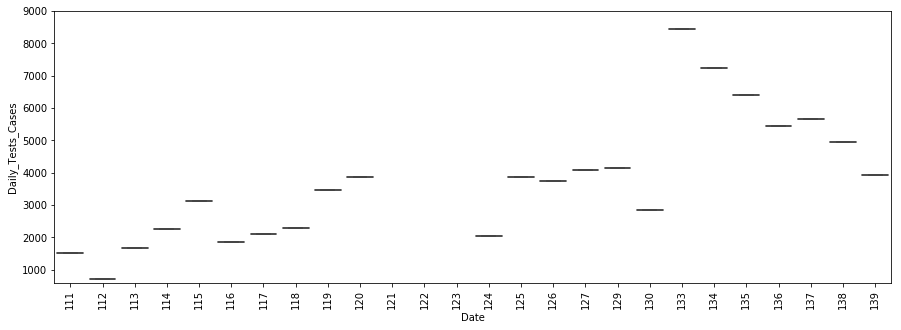

In [106]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Daily_Tests_Cases'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Daily_Tests_Cases", data=data2)
fig.axis(ymin=600, ymax=9000);
plt.xticks(rotation=90);

# 12. Doubling_Time

In [107]:
read_df.Doubling_Time.describe()

count    26.000000
mean      5.680769
std       0.574121
min       4.600000
25%       5.200000
50%       5.800000
75%       6.100000
max       6.500000
Name: Doubling_Time, dtype: float64

In [108]:
# Displaying mean 
read_df.Doubling_Time.mean()

5.680769230769231

In [109]:
# displaying mode 
read_df.Doubling_Time.mode()

0    6.1
dtype: float64

In [110]:
# displaying median 
read_df.Doubling_Time.median()

5.8

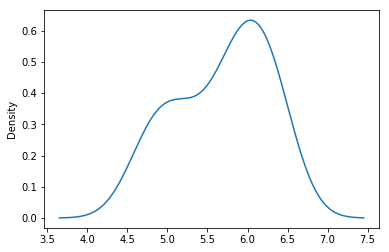

In [111]:
# plot density curve of Doubling_Time after cleaning null values
read_df.Doubling_Time.plot.density()

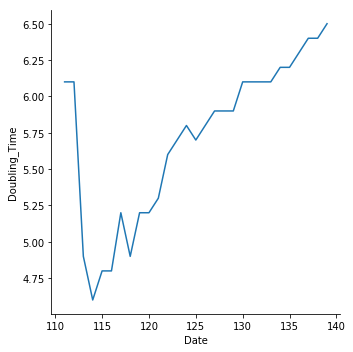

In [112]:
# Relplot
sns.relplot(x="Date", y="Doubling_Time", kind="line", data=read_df)

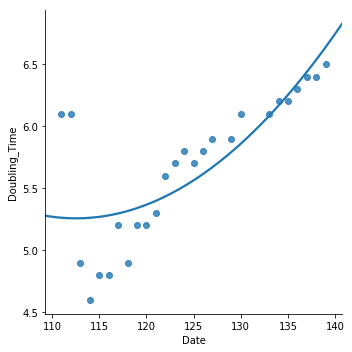

In [113]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Doubling_Time", data = read_df, order = 2, ci = None)

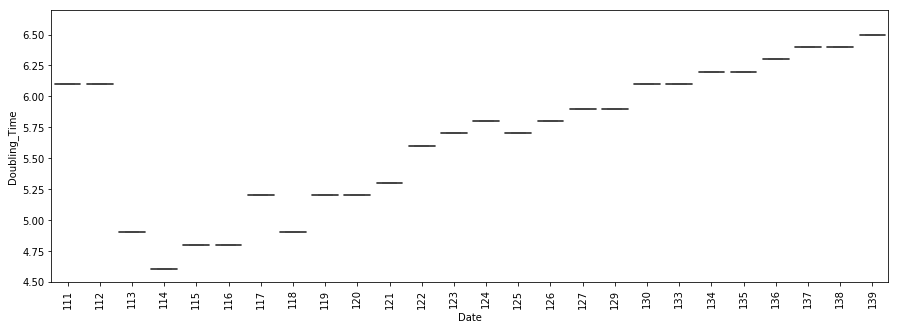

In [114]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Doubling_Time'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Doubling_Time", data=data2)
fig.axis(ymin=4.5, ymax=6.7);
plt.xticks(rotation=90);

# 13. Growth_Rate

In [115]:
read_df.Growth_Rate.describe()

count    26.000000
mean      6.219231
std       2.489019
min       2.200000
25%       4.500000
50%       5.750000
75%       7.425000
max      11.200000
Name: Growth_Rate, dtype: float64

In [116]:
# Displaying mean 
read_df.Growth_Rate.mean()

6.2192307692307685

In [117]:
# displaying mode 
read_df.Growth_Rate.mode()

0    3.6
1    4.5
2    5.8
dtype: float64

In [118]:
# displaying median 
read_df.Growth_Rate.median()

5.75

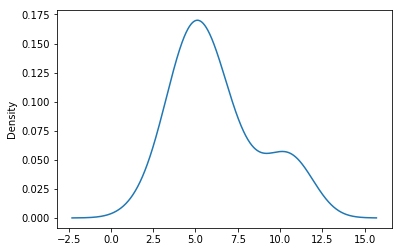

In [119]:
# plot density curve of Growth_Rate after cleaning null values
read_df.Growth_Rate.plot.density()

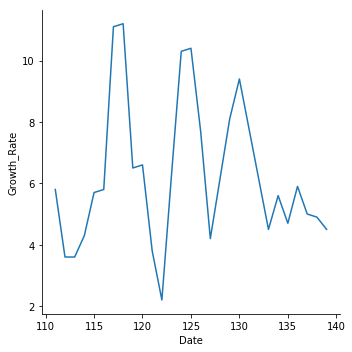

In [120]:
# Relplot
sns.relplot(x="Date", y="Growth_Rate", kind="line", data=read_df)

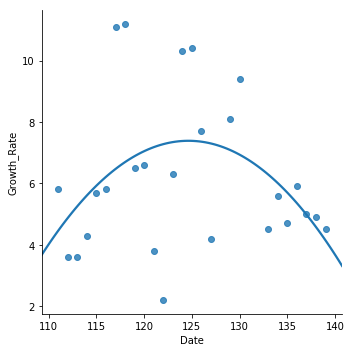

In [121]:
# Plotting the data scatter                                                                        
sns.lmplot(x ="Date", y ="Growth_Rate", data = read_df, order = 2, ci = None)

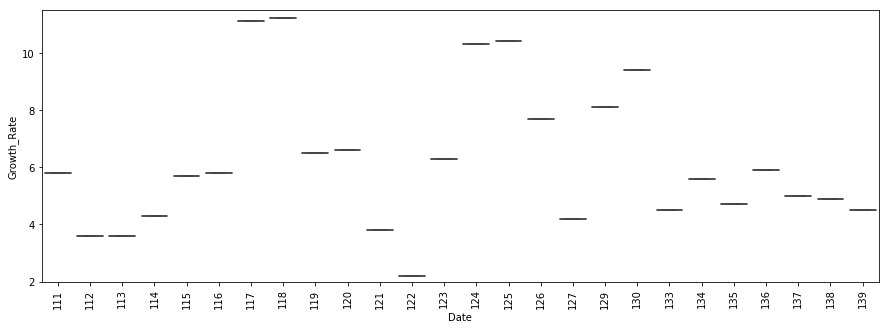

In [122]:
# Box Plot
var = 'Date'
data2 = pd.concat([read_df['Growth_Rate'], read_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x=var, y="Growth_Rate", data=data2)
fig.axis(ymin=2, ymax=11.5);
plt.xticks(rotation=90);

# Plotting All Columns

Text(0.5, 1.0, 'No. of days of recorded cases under each category')

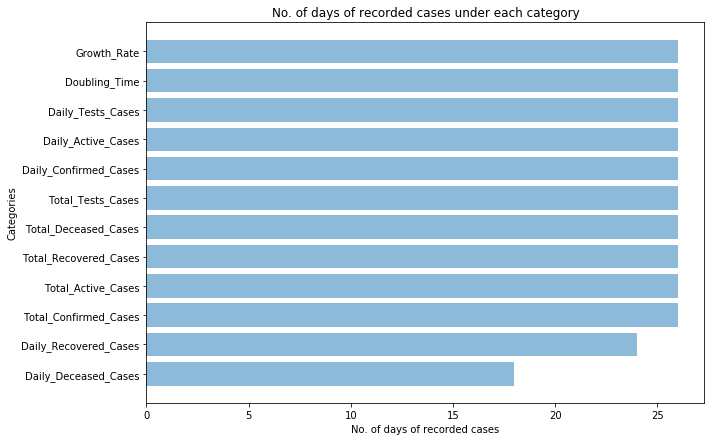

In [123]:
# number of user have given ratings to each category; Gyms and Bakeries having least ratings
no_of_zeros = read_df[column_names[1:]].astype(bool).sum(axis=0).sort_values()


plt.figure(figsize=(10,7))

plt.barh(np.arange(len(column_names[1:])), no_of_zeros.values, align='center', alpha=0.5)

plt.yticks(np.arange(len(column_names[1:])), no_of_zeros.index)

plt.xlabel('No. of days of recorded cases')

plt.ylabel('Categories')

plt.title('No. of days of recorded cases under each category')

Text(0.5, 1.0, 'No. of Cases under each category')

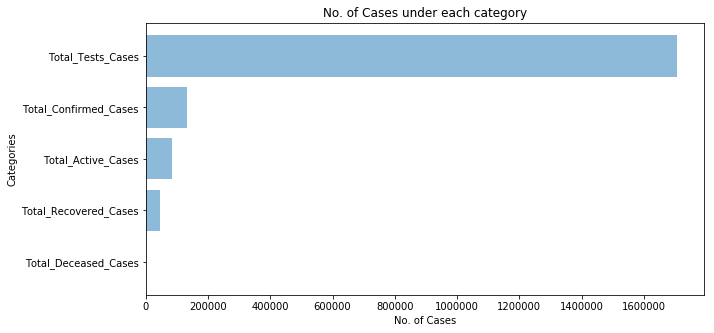

In [124]:
# number of user have given ratings to each category; Gyms and Bakeries having least ratings
no_of_zeros = read_df[column_names[1:6]].sum(axis=0).sort_values()


plt.figure(figsize=(10,5))

plt.barh(np.arange(len(column_names[1:6])), no_of_zeros.values, align='center', alpha=0.5)

plt.yticks(np.arange(len(column_names[1:6])), no_of_zeros.index)

plt.xlabel('No. of Cases')

plt.ylabel('Categories')

plt.title('No. of Cases under each category')

Text(0.5, 1.0, 'No. of Cases under each category')

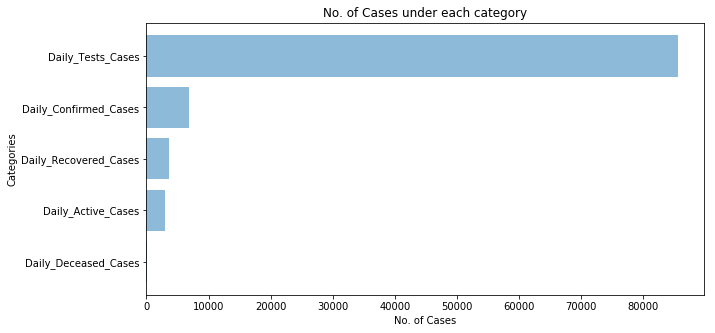

In [125]:
# number of user have given ratings to each category; Gyms and Bakeries having least ratings
no_of_zeros = read_df[column_names[6:11]].sum(axis=0).sort_values()


plt.figure(figsize=(10,5))

plt.barh(np.arange(len(column_names[6:11])), no_of_zeros.values, align='center', alpha=0.5)

plt.yticks(np.arange(len(column_names[6:11])), no_of_zeros.index)

plt.xlabel('No. of Cases')

plt.ylabel('Categories')

plt.title('No. of Cases under each category')

Text(0.5, 1.0, 'Infection Speed')

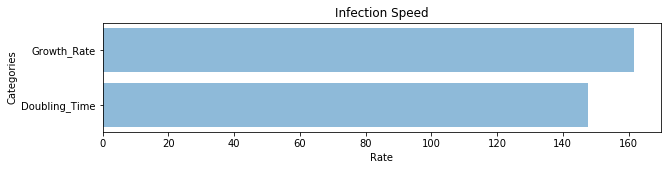

In [126]:
# number of user have given ratings to each category; Gyms and Bakeries having least ratings
no_of_zeros = read_df[column_names[11:13]].sum(axis=0).sort_values()


plt.figure(figsize=(10,2))

plt.barh(np.arange(len(column_names[11:13])), no_of_zeros.values, align='center', alpha=0.5)

plt.yticks(np.arange(len(column_names[11:13])), no_of_zeros.index)

plt.xlabel('Rate')

plt.ylabel('Categories')

plt.title('Infection Speed')

In [127]:
avg_rating = read_df[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()
avg_rating

Daily_Deceased_Cases         4.192308
Doubling_Time                5.680769
Growth_Rate                  6.219231
Total_Deceased_Cases        75.423077
Daily_Active_Cases         117.923077
Daily_Recovered_Cases      142.192308
Daily_Confirmed_Cases      265.846154
Total_Recovered_Cases     1774.230769
Total_Active_Cases        3283.615385
Daily_Tests_Cases         3721.869565
Total_Confirmed_Cases     5133.269231
Total_Tests_Cases        71141.291667
dtype: float64

Text(0.5, 1.0, 'Average rating per Category')

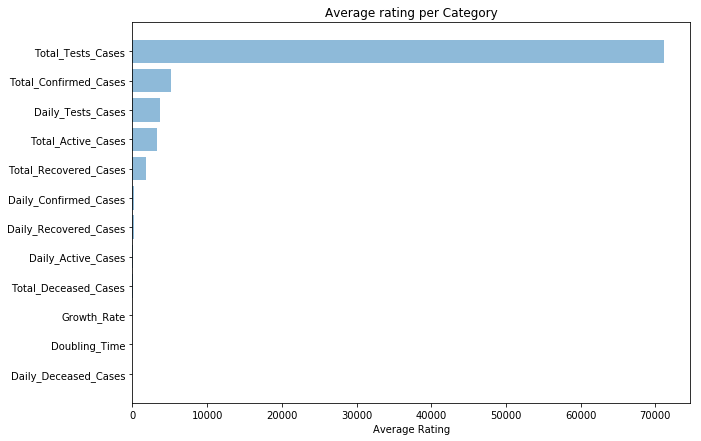

In [128]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


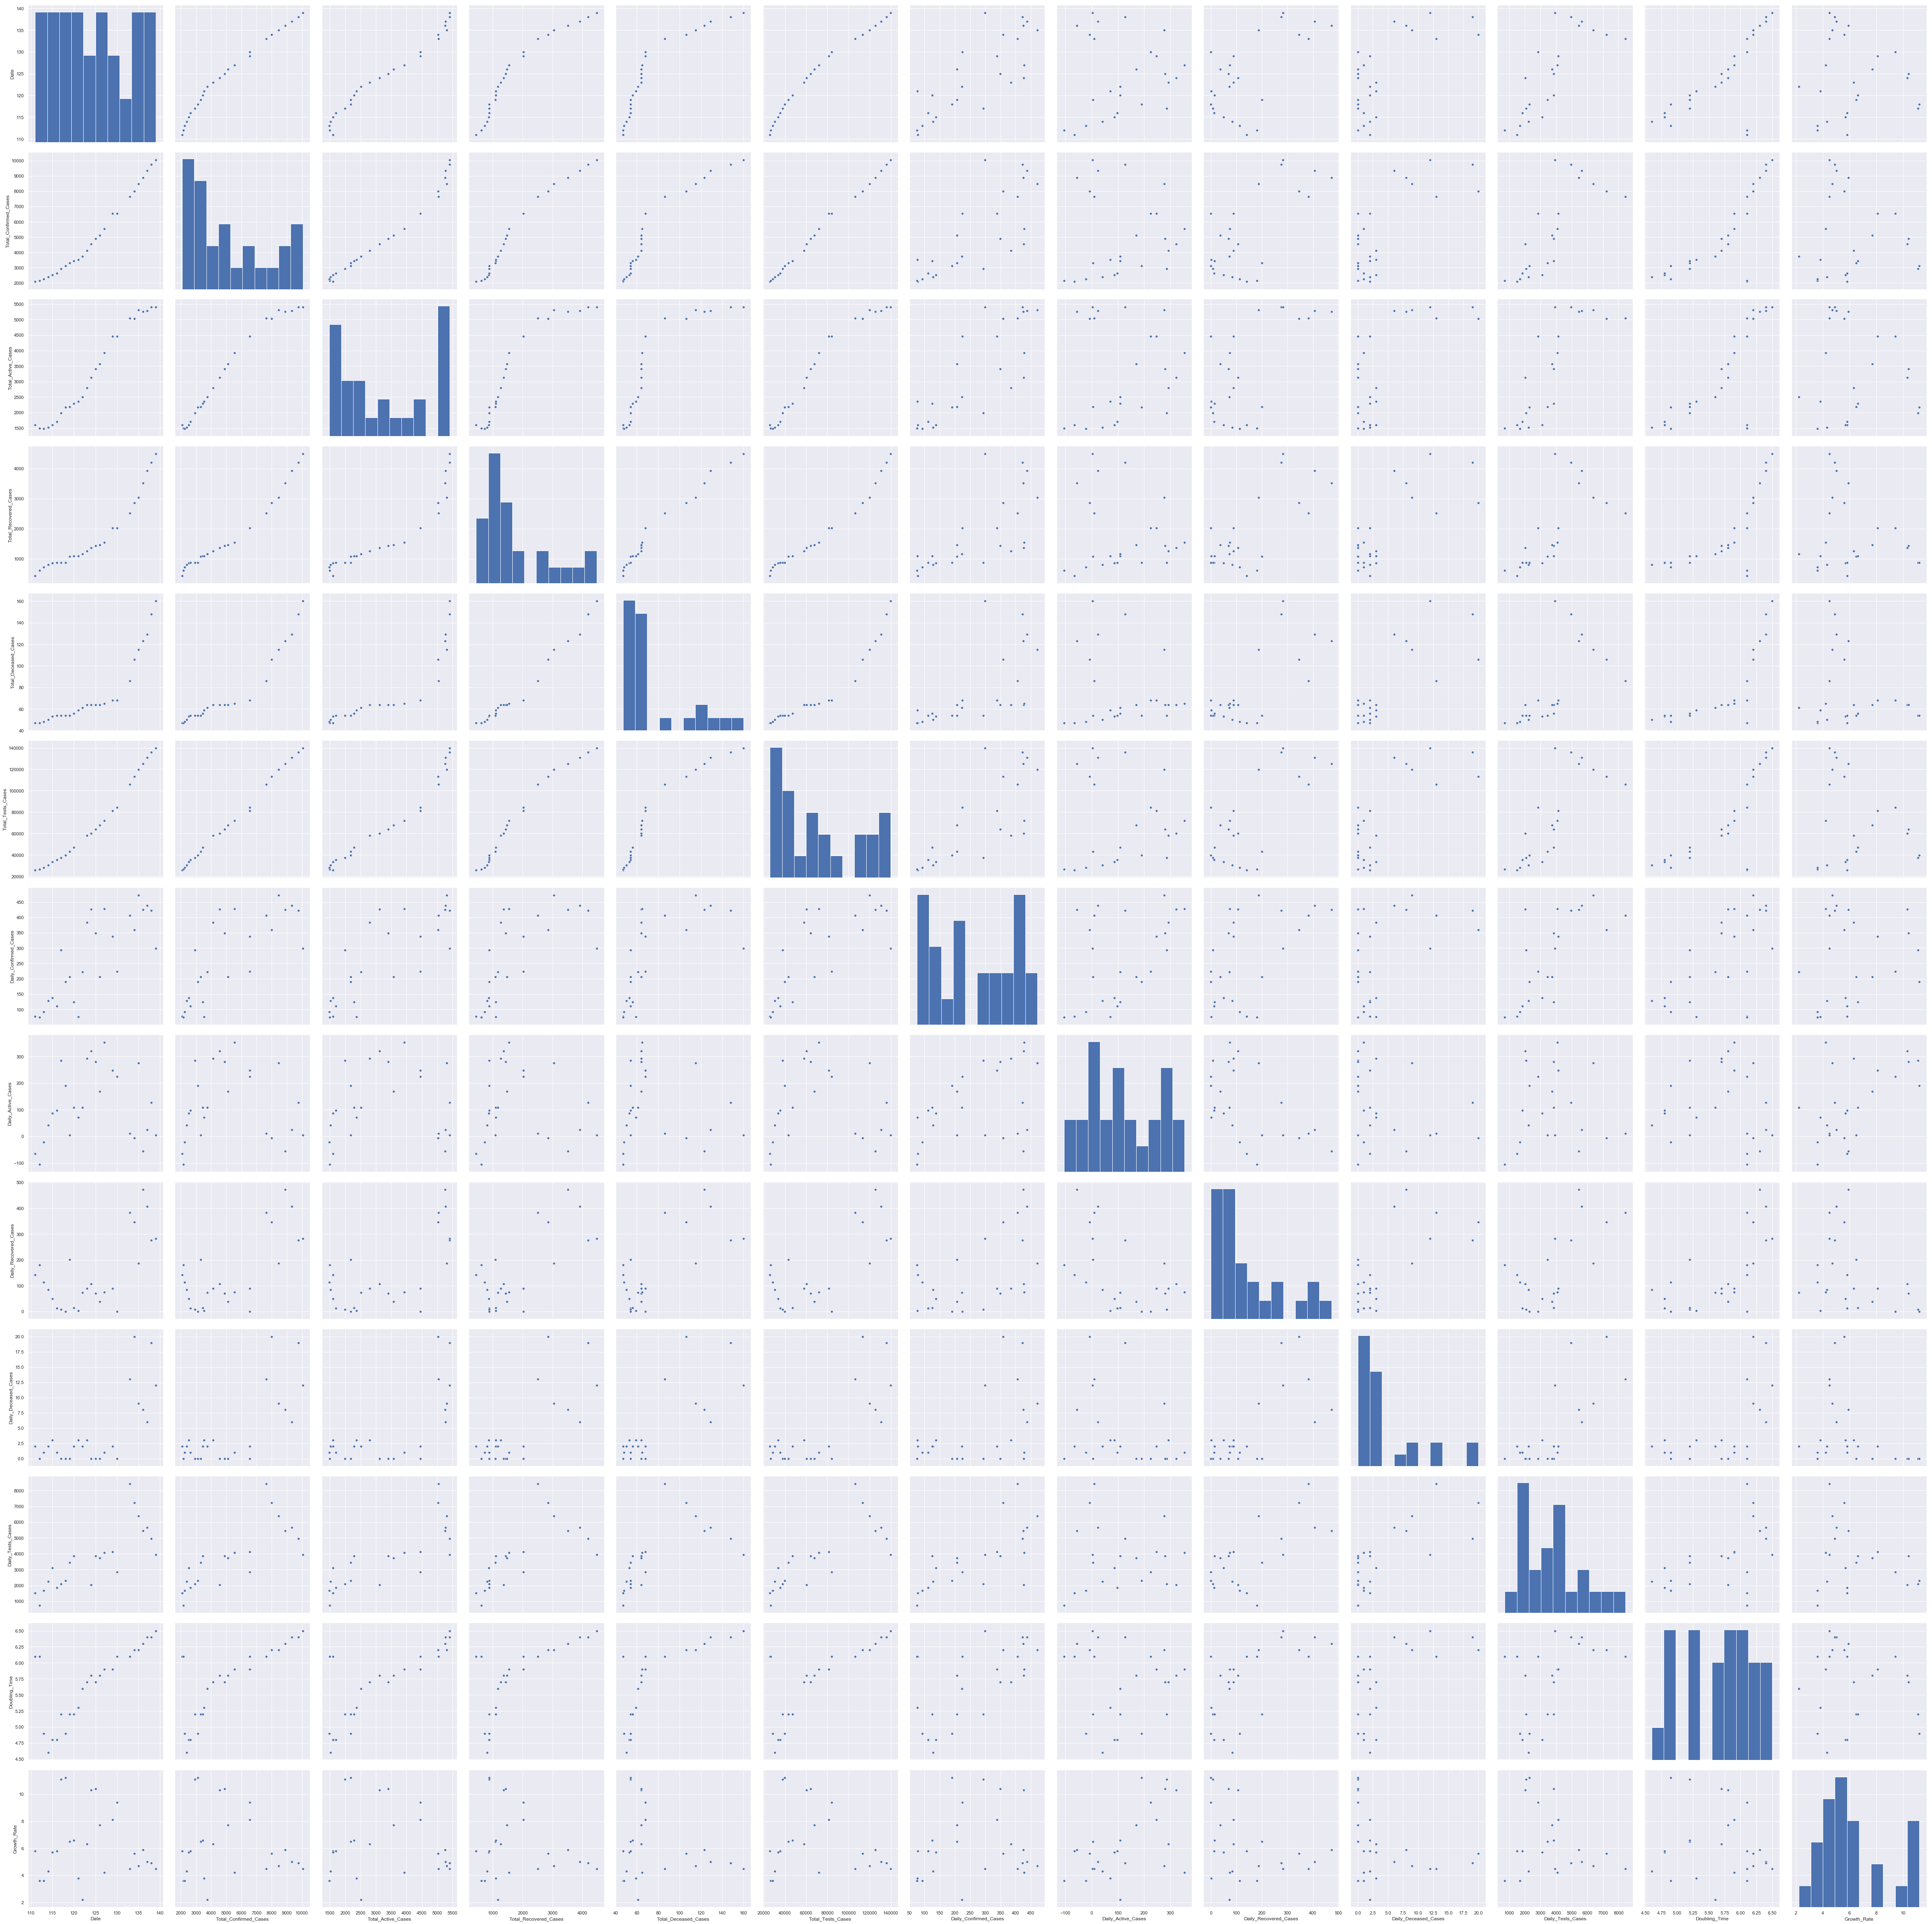

In [129]:
#scatterplot
sns.set()
sns.pairplot(read_df[column_names], size = 5.0)
plt.show()

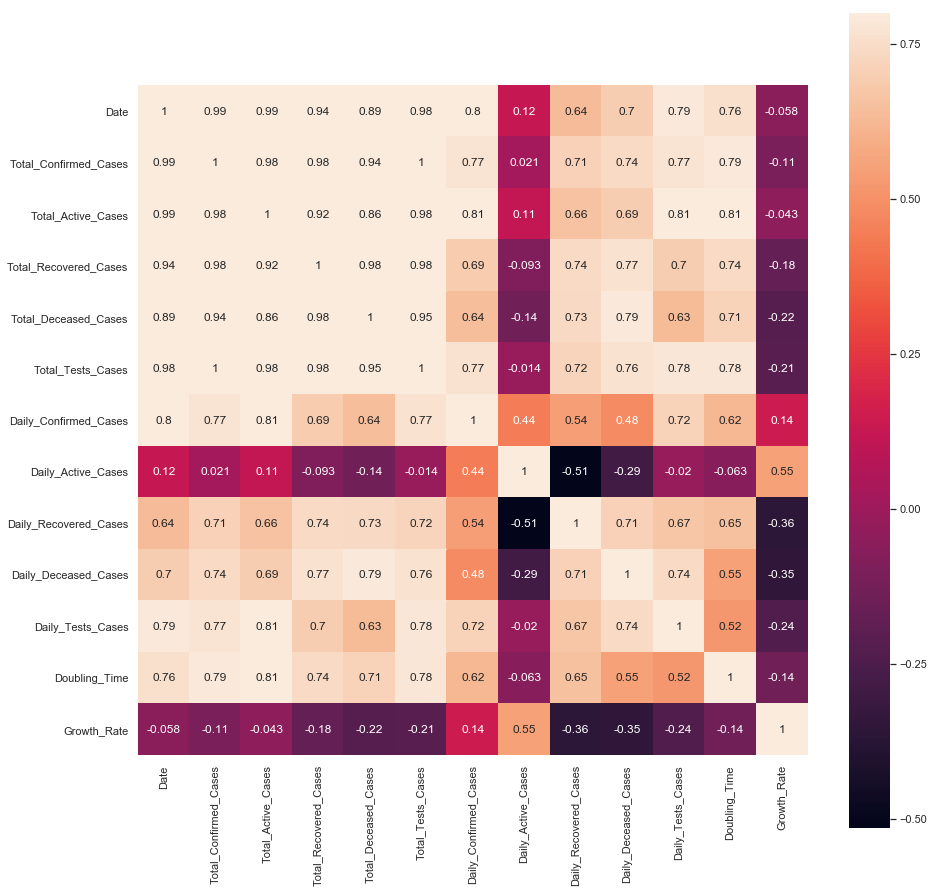

In [130]:
#correlation matrix
corrmat_read_df = read_df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat_read_df, vmax=.8, square=True, annot=True);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'Cases')

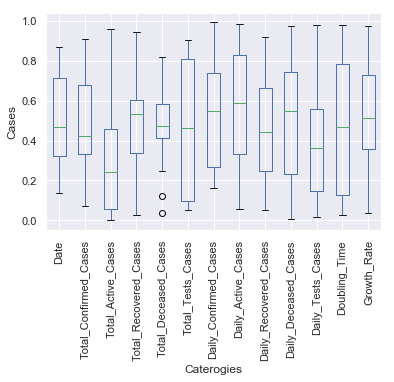

In [131]:
df = pd.DataFrame(np.random.rand(13,13), columns = read_df.columns)
df.plot.box(grid = 'True', rot = 90)
plt.xlabel('Caterogies')
plt.ylabel('Cases')

# Logistic Regression

In [132]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [133]:
x = list(read_df.iloc[:,0])
y = list(read_df.iloc[:,1])

In [134]:
print("x: ", x)
print("")
print("y: ", y)

x:  [111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 133, 134, 135, 136, 137, 138, 139]

y:  [2081, 2156, 2248, 2376, 2514, 2625, 2918, 3108, 3314, 3439, 3515, 3738, 4122, 4549, 4898, 5104, 5532, 6542, 6542, 7639, 7998, 8470, 8895, 9333, 9755, 10054]


In [135]:
fit = curve_fit(logistic_model, x, y, p0=[6,150,20000], maxfev=1000)        
fit

(array([1.27105840e+01, 1.41284526e+02, 2.23263571e+04]),
 array([[3.47826201e-01, 1.59334970e+00, 1.52642508e+03],
        [1.59334970e+00, 7.61500756e+00, 7.36052815e+03],
        [1.52642508e+03, 7.36052815e+03, 7.13800564e+06]]))

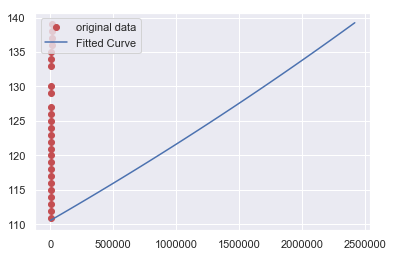

In [136]:
plt.plot(y,x,'ro',label="original data")                
                                                                
t=np.linspace(0,3600*24*28,26)                                     

popt, pcov = optimize.curve_fit(logistic_model, t, x, maxfev=20000) 
                                                                            
#plt.plot(t, logistic_model(t, *fit), label="Fitted Curve")
plt.plot(t, logistic_model(t, *popt), label="Fitted Curve")

plt.legend(loc='upper left')
plt.show()

In [137]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.5897679209216782, 2.7595303155304656, 2671.704630976988]

In [138]:
a = read_df.iloc[-1, 11]

In [139]:
# Get the maximum element from a Numpy array
maxElement = np.amax(read_df.Daily_Confirmed_Cases)                         
print('Max element from Numpy Array : ', maxElement)

# Get the indices of maximum element in numpy array
result = np.where(read_df.Daily_Confirmed_Cases == maxElement)
print('List of Indices of maximum element :', result[0])

Max element from Numpy Array :  472
List of Indices of maximum element : [21]


In [140]:
# Get the day whose index of new case and date is same
b = read_df.iloc[21, 0]

In [141]:
c = read_df.iloc[-1, 1]

In [142]:
print("Here,") 
print("  a: Infection Speed (Doubling Time): ", a)          
print("  b: Day with maximum infection occured: ", b )
print("  c: Total number of recorded infected people at the infection's end: ", c) 

Here,
  a: Infection Speed (Doubling Time):  6.5
  b: Day with maximum infection occured:  135
  c: Total number of recorded infected people at the infection's end:  10054


In [143]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
sol

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


368

# Exponential model

In [144]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [145]:
exp_fit = curve_fit(exponential_model, x, y, p0=[1,0,1], maxfev=20000)
errors = [np.sqrt(exp_fit[1][i][i]) for i in [0,1,2]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 20000.

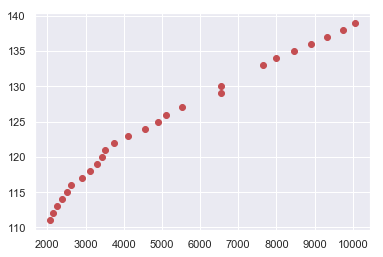

In [146]:
plt.plot(y,x,'ro',label="original data")                              

popt, pcov = optimize.curve_fit(exponential_model, y, x, maxfev=20000) 
t=np.linspace(0,3600*24*28,11)
              
plt.plot(t, exponential_model(t, *popt), label="Fitted Curve")

plt.legend(loc='upper left')
plt.show()

# Plots

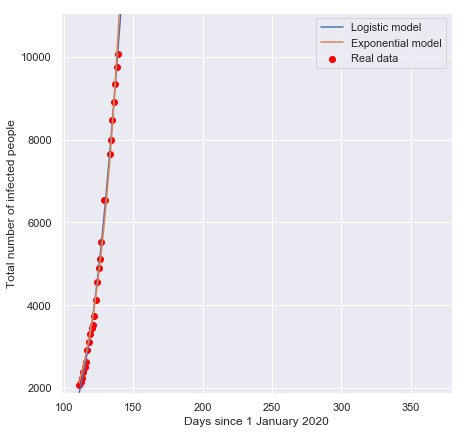

In [147]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y,label="Real data",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )

# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x],
         label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

# Analysis of residuals

In [148]:
y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
y_pred_logistic

[1886.7432281928363,
 2027.155271810352,
 2176.903909030907,
 2336.4414229483396,
 2506.2166126985812,
 2686.670300096075,
 2878.230266130926,
 3081.3056167498535,
 3296.2805925331104,
 3523.5078549986606,
 3763.3013032395666,
 4015.9284981759665,
 4281.602797406997,
 4560.475330759499,
 4852.626974159472,
 5158.060506136048,
 5476.693155589732,
 6152.756845087749,
 6509.53767203616,
 7648.745397143405,
 8049.1024733169,
 8458.339059808613,
 8875.447840397072,
 9299.332886410963,
 9728.819906182485,
 10162.668367394974]

In [149]:
y_pred_exp =  [exponential_model(i,exp_fit[0][0], exp_fit[0][1], exp_fit[0][2]) for i in x]
y_pred_exp

[2122.860665957763,
 2247.6077610085013,
 2379.6854538573657,
 2519.5245173737044,
 2667.581038223918,
 2824.33790440323,
 2990.3063801802473,
 3166.0277735910936,
 3352.075201921609,
 3549.0554609357714,
 3757.611003946858,
 3978.422037186091,
 4212.208738302857,
 4459.733605232146,
 4721.803943090079,
 4999.274497208543,
 5293.050240896666,
 5933.406213033405,
 6282.074969632171,
 7455.9023867103115,
 7894.038614225908,
 8357.92133678733,
 8849.0635130716,
 9369.06700876835,
 9919.627821082548,
 10502.541610248376]

In [150]:
mean_squared_error(y,y_pred_logistic)

16020.339190962124

In [151]:
mean_squared_error(y,y_pred_exp)

41999.5309910943